In [56]:
#Importing Packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")

In [57]:
data = 'C:/Users/CLINTON/Documents/GAMES Internship/EBUKA/train.csv'
df = pd.read_csv(data, index_col="id")
df

,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
id,,,,,,,,,,
1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0000,2.772589
2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0000,3.688879
3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0000,3.465736
4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0000,2.564949
5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...
8704,2018-08-05 00:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,19.0012,5.030438
8705,2018-08-05 01:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,16.9979,4.465908
8706,2018-08-05 02:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,19.9995,4.290459


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 1 to 8708
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   8708 non-null   object 
 1   season      8708 non-null   object 
 2   holiday     8708 non-null   object 
 3   workingday  8708 non-null   object 
 4   weather     8708 non-null   object 
 5   temp        7506 non-null   float64
 6   temp_feel   8606 non-null   float64
 7   humidity    8669 non-null   float64
 8   windspeed   8508 non-null   float64
 9   demand      8708 non-null   float64
dtypes: float64(5), object(5)
memory usage: 748.3+ KB


### Dealing with Missing Values

In [59]:
#Missing Values
df.isnull().sum()

timestamp        0
season           0
holiday          0
workingday       0
weather          0
temp          1202
temp_feel      102
humidity        39
windspeed      200
demand           0
dtype: int64

In [60]:
#Replacing Missing Values in the temp column with the mean temp
mean_temp = df['temp'].mean()
df['temp'].replace(np.nan,mean_temp, inplace=True)


In [61]:
#dropping other missing values
df.dropna(subset=["temp_feel", 'humidity', 'windspeed' ], axis=0, inplace=True)

In [62]:
df.isnull().sum()

timestamp     0
season        0
holiday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
demand        0
dtype: int64

In [63]:
df.shape

(8370, 10)

In [64]:
target_variable= df["demand"]
train_data = df.drop(columns='demand')

In [65]:
#Exploring Categorical Variables
df['season'].value_counts()

summer    2628
spring    2576
fall      1852
winter    1314
Name: season, dtype: int64

In [66]:
df['holiday'].value_counts()

No     8142
Yes     228
Name: holiday, dtype: int64

In [67]:
df['weather'].value_counts()

Clear or partly cloudy               5634
Mist                                 2063
Light snow or rain                    672
heavy rain/ice pellets/snow + fog       1
Name: weather, dtype: int64

### Cleaning timestamp column



In [68]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [69]:
df['timestamp_year'] = df['timestamp'].dt.year
df['timestamp_month'] = df['timestamp'].dt.month
df['timestamp_day'] = df['timestamp'].dt.day
df['timestamp_hour'] = df['timestamp'].dt.hour
df['timestamp_minute'] = df['timestamp'].dt.minute
df['timestamp_sec'] = df['timestamp'].dt.second

In [70]:
df

,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,timestamp_year,timestamp_month,timestamp_day,timestamp_hour,timestamp_minute,timestamp_sec
id,,,,,,,,,,,,,,,,
1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0000,2.772589,2017,1,1,0,0,0
2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0000,3.688879,2017,1,1,1,0,0
3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0000,3.465736,2017,1,1,2,0,0
4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0000,2.564949,2017,1,1,3,0,0
5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0000,0.000000,2017,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,2018-08-05 00:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,19.0012,5.030438,2018,8,5,0,0,0
8705,2018-08-05 01:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,16.9979,4.465908,2018,8,5,1,0,0
8706,2018-08-05 02:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,19.9995,4.290459,2018,8,5,2,0,0


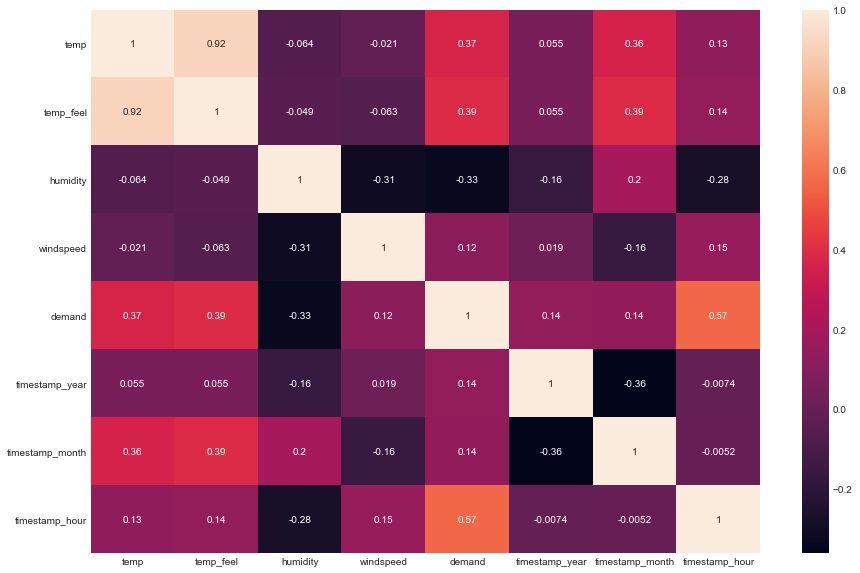

In [71]:
df.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
Correlation_Matrix = df.corr()
Most_Correlated_Features = Correlation_Matrix.index[abs(Correlation_Matrix["demand"])>0.1]
sns.heatmap(df[Most_Correlated_Features].corr(),annot=True)

In [72]:
df.drop(['timestamp','timestamp_minute', 'timestamp_sec','timestamp_day'], axis = 1, inplace = True)

In [73]:
data = df.copy()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8370 entries, 1 to 8708
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           8370 non-null   object 
 1   holiday          8370 non-null   object 
 2   workingday       8370 non-null   object 
 3   weather          8370 non-null   object 
 4   temp             8370 non-null   float64
 5   temp_feel        8370 non-null   float64
 6   humidity         8370 non-null   float64
 7   windspeed        8370 non-null   float64
 8   demand           8370 non-null   float64
 9   timestamp_year   8370 non-null   int64  
 10  timestamp_month  8370 non-null   int64  
 11  timestamp_hour   8370 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 850.1+ KB


### Data Exploration

Text(0.5, 1.0, 'demand for timestamp_hour')

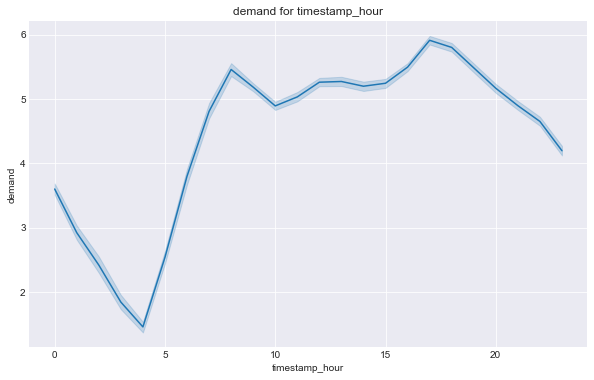

In [75]:
#demand vs time_stamp_hour
plt.figure(figsize=(10,6))
sns.lineplot(x = df["timestamp_hour"], y = df['demand'])

plt.xlabel("timestamp_hour")
plt.ylabel("demand")
plt.title("demand for timestamp_hour")



Text(0.5, 1.0, 'demand vs humidity')

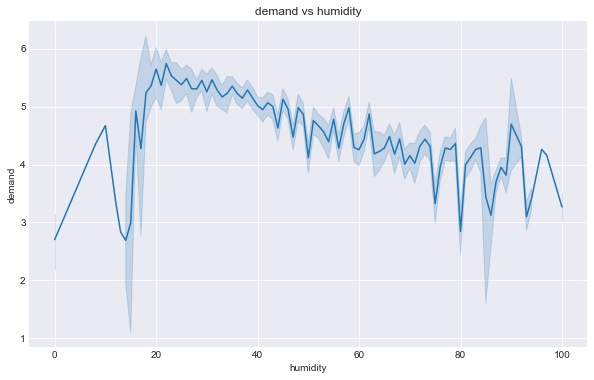

In [76]:
#Demand vs humidity
plt.figure(figsize=(10,6))
sns.lineplot(x = df["humidity"], y = df['demand'])

plt.xlabel("humidity")
plt.ylabel("demand")
plt.title("demand vs humidity")


In [77]:
#Demand per season
demand_per_season = df.groupby(['season'])['demand'].sum().reset_index().sort_values(by="demand",ascending=False)
demand_per_season


,season,demand
2,summer,12356.896637
1,spring,10266.954568
0,fall,8838.201777
3,winter,5844.546816


Text(0.5, 1.0, 'demand for all seasons')

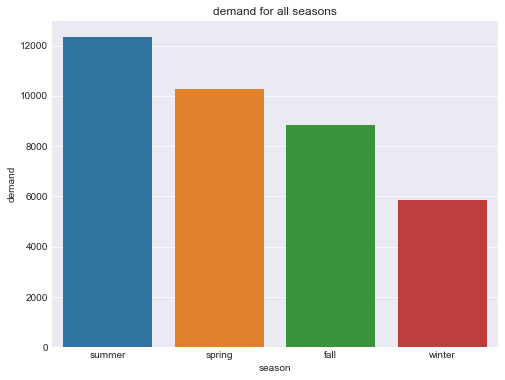

In [78]:
plt.figure(figsize=(8,6))
sns.barplot(x = demand_per_season['season'], y = demand_per_season['demand'])

plt.xlabel('season')
plt.ylabel("demand")
plt.title("demand for all seasons")

In [79]:
#Demand by Weather
demand_weather = df.groupby(['weather'])['demand'].sum().reset_index().sort_values(by="demand",ascending=False)
demand_weather

,weather,demand
0,Clear or partly cloudy,25617.376339
2,Mist,9101.794206
1,Light snow or rain,2582.329387
3,heavy rain/ice pellets/snow + fog,5.099866


Text(0.5, 1.0, 'demand for all weathers')

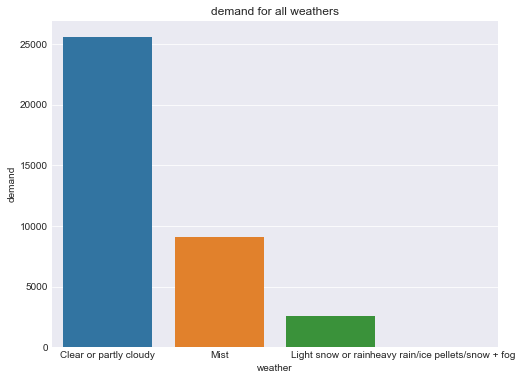

In [80]:
plt.figure(figsize=(8,6))
sns.barplot(x = demand_weather['weather'], y = demand_weather['demand'])

plt.xlabel('weather')
plt.ylabel("demand")
plt.title("demand for all weathers")

In [81]:
#Demand by holiday
demand_holiday = df.groupby(['holiday'])['demand'].sum().reset_index().sort_values(by="demand",ascending=False)
demand_holiday

,holiday,demand
0,No,36291.321282
1,Yes,1015.278517


Text(0.5, 1.0, 'demand for holiday')

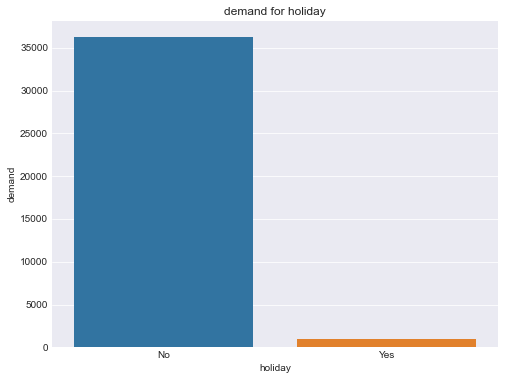

In [82]:
plt.figure(figsize=(8,6))
sns.barplot(x = demand_holiday['holiday'], y = demand_holiday['demand'])

plt.xlabel('holiday')
plt.ylabel("demand")
plt.title("demand for holiday")

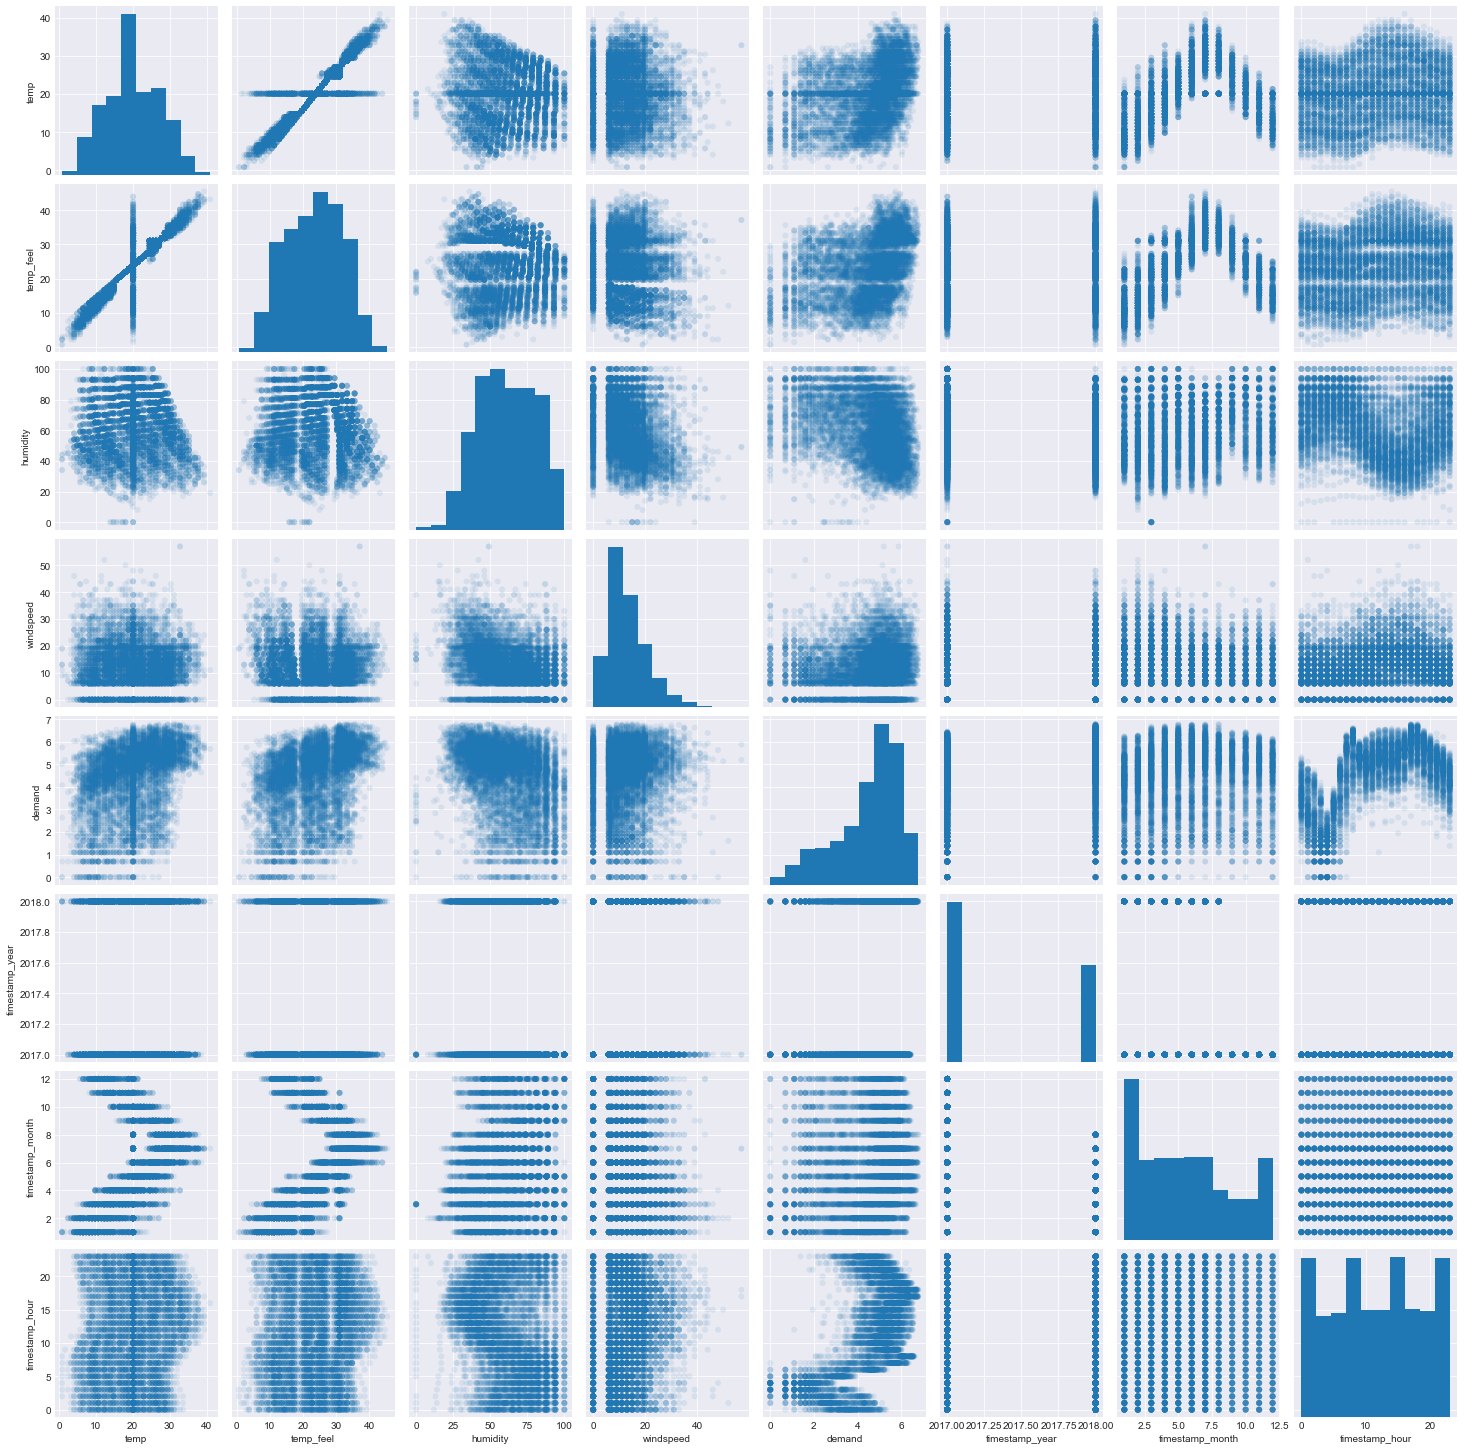

In [83]:
#Pairplot for Most correlated_features
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))

### Findings from Data Visualization
- Demand fro bikes are higher in the evening period of the day, between 4-5pm, there's also a good demand by 8am
- There is more demand in summer than other seasons and least demand in winter
- Bikes are rented more when the weather is clear or partly cloudy
- There is very low demand on holidays


In [84]:
numerical_features = df._get_numeric_data().columns 
categorical_features = df.columns.difference(numerical_features)

In [85]:
numerical_features

Index(['temp', 'temp_feel', 'humidity', 'windspeed', 'demand',
       'timestamp_year', 'timestamp_month', 'timestamp_hour'],
      dtype='object')

In [86]:
categorical_features

Index(['holiday', 'season', 'weather', 'workingday'], dtype='object')

In [87]:
#Encoding Categorical variables
df = pd.get_dummies(df, columns = categorical_features, drop_first=True)

In [88]:
df.head()

,temp,temp_feel,humidity,windspeed,demand,timestamp_year,timestamp_month,timestamp_hour,holiday_Yes,season_spring,season_summer,season_winter,weather_Light snow or rain,weather_Mist,weather_heavy rain/ice pellets/snow + fog,workingday_Yes
id,,,,,,,,,,,,,,,,
1,9.84,14.395,81.0,0.0,2.772589,2017,1,0,0,1,0,0,0,0,0,0
2,9.02,13.635,80.0,0.0,3.688879,2017,1,1,0,1,0,0,0,0,0,0
3,9.02,13.635,80.0,0.0,3.465736,2017,1,2,0,1,0,0,0,0,0,0
4,9.84,14.395,75.0,0.0,2.564949,2017,1,3,0,1,0,0,0,0,0,0
5,9.84,14.395,75.0,0.0,0.000000,2017,1,4,0,1,0,0,0,0,0,0


In [89]:
#Checking for Skewness in Numeric Column

numerical_features = data._get_numeric_data().columns 


skew_limit = abs(0.7) # define a limit above which we will log transform
skew_vals = data[numerical_features].skew()

In [90]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
demand,-0.972466


#### No Normalization because all numeric features are moderately skewed

In [91]:
df.head()

,temp,temp_feel,humidity,windspeed,demand,timestamp_year,timestamp_month,timestamp_hour,holiday_Yes,season_spring,season_summer,season_winter,weather_Light snow or rain,weather_Mist,weather_heavy rain/ice pellets/snow + fog,workingday_Yes
id,,,,,,,,,,,,,,,,
1,9.84,14.395,81.0,0.0,2.772589,2017,1,0,0,1,0,0,0,0,0,0
2,9.02,13.635,80.0,0.0,3.688879,2017,1,1,0,1,0,0,0,0,0,0
3,9.02,13.635,80.0,0.0,3.465736,2017,1,2,0,1,0,0,0,0,0,0
4,9.84,14.395,75.0,0.0,2.564949,2017,1,3,0,1,0,0,0,0,0,0
5,9.84,14.395,75.0,0.0,0.000000,2017,1,4,0,1,0,0,0,0,0,0


### Building Models

In [92]:
#Declaring Variables
y = df["demand"]
x = df.drop(columns='demand')

In [93]:
# Split the data into training and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### Linear Regression Model

In [94]:
X_train.shape

(5859, 15)

In [95]:
X_test.shape

(2511, 15)

In [96]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fitting model to training dataset
linear_model.fit(X_train, y_train)

#obtaining predictions
predicted_values = linear_model.predict(X_test)

In [97]:
#calculating the R^2 on the test data
linear_model.score(X_test, y_test)

0.49441268832836593

In [98]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
mae

0.8269782270999032

Text(0.5, 1.0, 'R^2 Using Test Data')

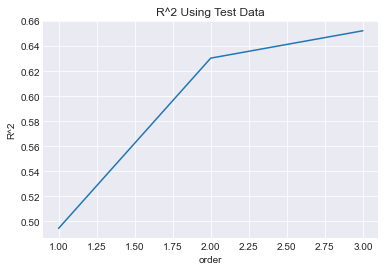

In [99]:
#Checking the order of polynomial for best fit model

from sklearn.preprocessing import PolynomialFeatures
Rsqu_test = []

order = [1,2,3]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(X_train)
    
    x_test_pr = pr.fit_transform(X_test)    
 
    linear_model.fit(x_train_pr, y_train)
    
    Rsqu_test.append(linear_model.score(x_test_pr, y_test))

sns.lineplot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [100]:
pr = PolynomialFeatures(degree=3)
    
x_train_pr = pr.fit_transform(X_train)
    
x_test_pr = pr.fit_transform(X_test)    
 
linear_model.fit(x_train_pr, y_train)
    

LinearRegression()

In [101]:
linear_model.score(x_test_pr, y_test)

0.6522882358629358

#### Decision Tree Model

In [102]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt = dt.fit(x_train_pr, y_train)

In [103]:
#Checking R^2 score
dt.score(x_test_pr, y_test)

0.8798726936767095

In [104]:
predicted_values = dt.predict(x_test_pr)

In [105]:
mae = mean_absolute_error(y_test, predicted_values)
mae

0.3425278380883149

#### Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(random_state=42)
rf = rf.fit(x_train_pr, y_train)

In [107]:
#Checking R^2 score
rf.score(x_test_pr, y_test)

0.939059477845045

In [108]:
predicted_values = rf.predict(x_test_pr)

In [109]:
mae = mean_absolute_error(y_test, predicted_values)
mae

0.2476649591359606

####  ExtraTreeRegressor

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
et =  ExtraTreesRegressor(random_state=42)
et = et.fit(x_train_pr, y_train)

In [50]:
et.score(x_test_pr, y_test)

0.9412257087586731

In [51]:
#Checking Mean absolute error
predicted_values_et = et.predict(x_test_pr)
mae_et = mean_absolute_error(y_test, predicted_values_et)
mae_et

0.24246172077019823

#### Feature Importance

In [110]:
fp = rf.fit(X_train, y_train)

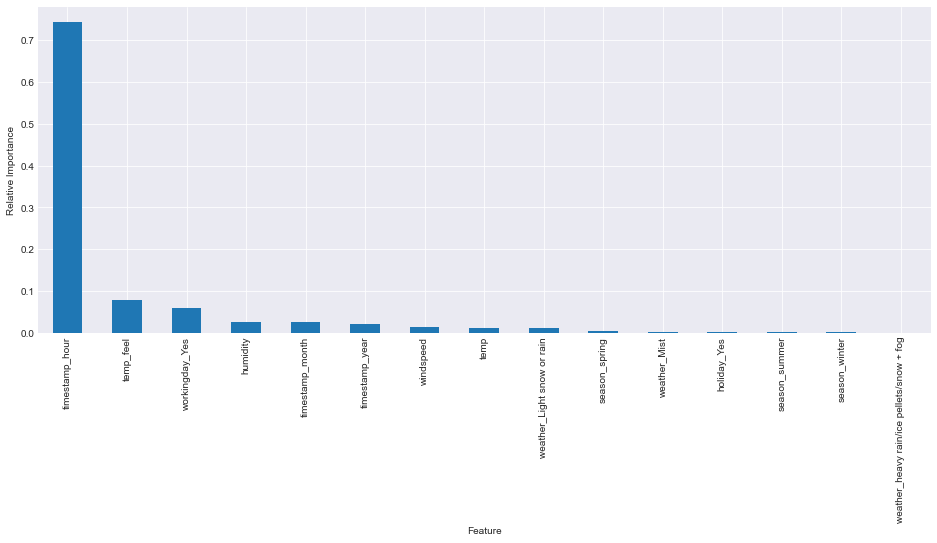

In [112]:
#Checking feature importance

feature_imp = pd.Series(rf.feature_importances_, index= x.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(xlabel='Feature');

##### The timestamp_hour which is the hour of the day is the most important feature in the model

# Cleaning Test Data

#### To eunsure Data Uniformity, the train data and test data has to be cleaned together, then splitted

In [367]:
train_data.tail()

,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
id,,,,,,,,,
8704,2018-08-05 00:00:00,fall,No,No,Clear or partly cloudy,30.34,34.85,70.0,19.0012
8705,2018-08-05 01:00:00,fall,No,No,Clear or partly cloudy,30.34,34.85,70.0,16.9979
8706,2018-08-05 02:00:00,fall,No,No,Clear or partly cloudy,30.34,34.85,70.0,19.9995
8707,2018-08-05 03:00:00,fall,No,No,Clear or partly cloudy,29.52,34.85,74.0,16.9979
8708,2018-08-05 04:00:00,fall,No,No,Clear or partly cloudy,29.52,34.85,74.0,16.9979


In [368]:
train_data.shape

(8370, 9)

In [369]:
test = 'C:/Users/CLINTON/Documents/GAMES Internship/EBUKA/test.csv'
test = pd.read_csv(test, index_col="id")
test

,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
id,,,,,,,,,
8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993
...,...,...,...,...,...,...,...,...,...
10882,2018-12-19 19:00:00,winter,No,Yes,Clear or partly cloudy,15.58,19.695,50.0,26.0027
10883,2018-12-19 20:00:00,winter,No,Yes,Clear or partly cloudy,14.76,17.425,57.0,15.0013
10884,2018-12-19 21:00:00,winter,No,Yes,Clear or partly cloudy,13.94,15.910,61.0,15.0013


In [370]:
test.shape

(1792, 9)

In [371]:
data = pd.concat([train_data, test], axis = 0)

In [372]:
#handling timestamp
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [373]:
data['timestamp_year'] = data['timestamp'].dt.year
data['timestamp_month'] = data['timestamp'].dt.month
data['timestamp_day'] = data['timestamp'].dt.day
data['timestamp_hour'] = data['timestamp'].dt.hour
data['timestamp_minute'] = data['timestamp'].dt.minute
data['timestamp_sec'] = data['timestamp'].dt.second

In [374]:
data.drop(['timestamp','timestamp_minute', 'timestamp_sec','timestamp_day'], axis = 1, inplace = True)

In [375]:
numerical_features = data._get_numeric_data().columns 
categorical_features = data.columns.difference(numerical_features)

In [376]:
#Encoding Categorical variables
data = pd.get_dummies(data, columns = categorical_features, drop_first=True)

In [377]:
# splitting dataframe by row index
train_data = data.iloc[:8370,:]
test_data = data.iloc[8370:,:]

#### Testing the data in ExtraTreeRegressor model which is the preferred model

In [378]:
#converting test data to polynomial
pr = PolynomialFeatures(degree=3)
    
x_test_pr = pr.fit_transform(test_data)

In [380]:
predicted_values = et.predict(x_test_pr)

In [381]:
predicted_values

array([2.6328993 , 3.52548061, 5.08235777, ..., 5.20643913, 4.95103847,
       4.50648006])

In [382]:
submission = pd.DataFrame(predicted_values, columns = ['demand'], index = test.index)

In [383]:
submission

,demand
id,
8709,2.632899
8710,3.525481
8712,5.082358
8713,5.599085
8714,5.955183
...,...
10882,5.831947
10883,5.484757
10884,5.206439


In [384]:
submission = submission.reset_index()

In [385]:
submission

,id,demand
0,8709,2.632899
1,8710,3.525481
2,8712,5.082358
3,8713,5.599085
4,8714,5.955183
...,...,...
1787,10882,5.831947
1788,10883,5.484757
1789,10884,5.206439
1790,10885,4.951038


In [386]:
outputfile = 'C:/Users/CLINTON/Documents/GAMES Internship/EBUKA/submission.csv'
submission.to_csv(outputfile, index=False)